In [1]:
import modules.SimulacaoKTz as ktzsim
import numpy as np
import matplotlib.pyplot as plt


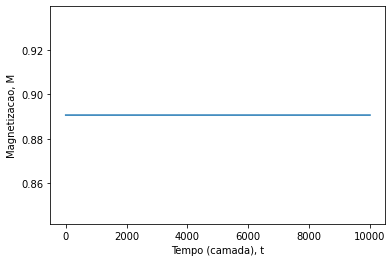

In [9]:

#define parametros fase ferromagnetica (ver diagrama KT no plano de trabalho)

K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = [1.0,1.0]
mapa_nome    = 'kttanh'



x       = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)
t_dados = np.arange(x.shape[0])

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t_dados,x[:,0])
ax.set_xlabel('Tempo (camada), t')
ax.set_ylabel('Magnetizacao, M')
plt.show()


d:\Dropbox\p\ufsc\pesquisa\orientandos\2022_mestrado_constantino\simulacoes\mapa_ktz_py\modules\SimulacaoKTz.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  arg  = (x[0] - K*x[1] + H) / T


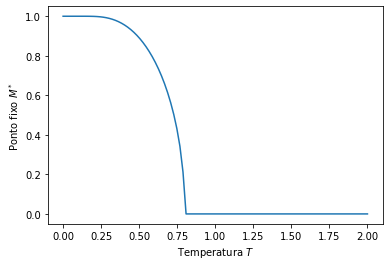

In [10]:
K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = [1.0,1.0]
mapa_nome    = 'kttanh'


def lineariza_lista(lst):
    return [ m for m_l in lst for m in m_l ]

T_valores = np.linspace(0,2,100)

x_dados = []
T_dados = []
for T in T_valores:
    x  = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)
    x_unico = np.unique(x[:,0])
    x_dados.append(x_unico)
    T_dados.append(T * np.ones(x_unico.size))

T_dados = np.array(lineariza_lista(T_dados))
x_dados = np.array(lineariza_lista(x_dados))

plt.plot(T_dados,x_dados,'-')
plt.xlabel(r'Temperatura $T$')
plt.ylabel(r'Ponto fixo $M^*$')
plt.show()

d:\Dropbox\p\ufsc\pesquisa\orientandos\2022_mestrado_constantino\simulacoes\mapa_ktz_py\modules\SimulacaoKTz.py:203: RuntimeWarning: overflow encountered in exp
  x[0] = 2.0 / (1.0 + numpy.exp(-2.0 * arg)) - 1.0
d:\Dropbox\p\ufsc\pesquisa\orientandos\2022_mestrado_constantino\simulacoes\mapa_ktz_py\modules\SimulacaoKTz.py:263: RuntimeWarning: overflow encountered in double_scalars
  return 2.0*arg/( 1.0 + (arg*arg) )


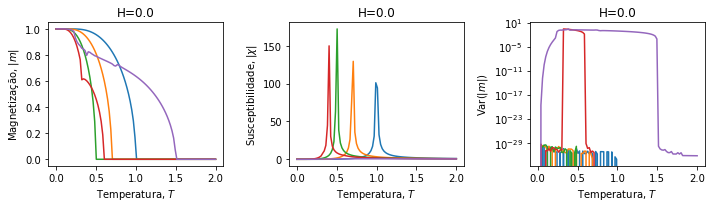

In [2]:
K_valores        = [ 0.0, 0.3, 0.5, 0.6, 1.5 ]
T_valores        = np.linspace(0.001,2,100) #T     = 0.5
delta            = 0.0
lamb             = 0.0
xR               = 0.0
H                = 0.0
t_transiente     = 10000
t_total          = 20000
x0               = [1.0,1.0]
mapa_nome        = 'kttanh'
usar_modulo_de_m = True


xm_dados, xvar_dados, xvarstd_dados, xsuscept_dados = [],[],[],[]

for K in K_valores:
    x_media, x_var, x_var_std, x_suscept = ktzsim.RodaSimulacao_Varios_T(K,T_valores,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome,usar_modulo_de_m)
    xm_dados.append(       x_media   )
    xvar_dados.append(     x_var     )
    xvarstd_dados.append(  x_var_std )
    xsuscept_dados.append( x_suscept )

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
for i,K in enumerate(K_valores):
    ax[0].plot(T_valores,       xm_dados[i]           , label=f'K={K}')
    ax[1].plot(T_valores, np.abs(xsuscept_dados[i])   , label=f'K={K}')
    ax[2].plot(T_valores,     xvar_dados[i]/T_valores , label=f'K={K}')
ax[0].set_xlabel( 'Temperatura, $T$')
ax[0].set_ylabel( 'Magnetização, $|m|$')
ax[0].set_title( f'H={H}')
ax[1].set_xlabel( 'Temperatura, $T$')
ax[1].set_ylabel(r'Susceptibilidade, $|\chi|$')
ax[1].set_title( f'H={H}')
ax[2].set_xlabel( 'Temperatura, $T$')
ax[2].set_ylabel(r'Var($|m|$)')
ax[2].set_title( f'H={H}')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()

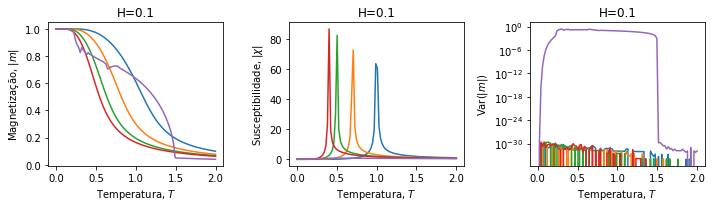

In [4]:
K_valores        = [ 0.0, 0.3, 0.5, 0.6, 1.5 ]
T_valores        = np.linspace(0.001,2,100) #T     = 0.5
delta            = 0.0
lamb             = 0.0
xR               = 0.0
H                = 0.1
t_transiente     = 10000
t_total          = 20000
x0               = [1.0,1.0]
mapa_nome        = 'kttanh'
usar_modulo_de_m = True


xm_dados, xvar_dados, xvarstd_dados, xsuscept_dados = [],[],[],[]

for K in K_valores:
    x_media, x_var, x_var_std, x_suscept = ktzsim.RodaSimulacao_Varios_T(K,T_valores,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome,usar_modulo_de_m)
    xm_dados.append(       x_media   )
    xvar_dados.append(     x_var     )
    xvarstd_dados.append(  x_var_std )
    xsuscept_dados.append( x_suscept )

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
for i,K in enumerate(K_valores):
    ax[0].plot(T_valores,       xm_dados[i]           , label=f'K={K}')
    ax[1].plot(T_valores, np.abs(xsuscept_dados[i])   , label=f'K={K}')
    ax[2].plot(T_valores,     xvar_dados[i]/T_valores , label=f'K={K}')
ax[0].set_xlabel( 'Temperatura, $T$')
ax[0].set_ylabel( 'Magnetização, $|m|$')
ax[0].set_title( f'H={H}')
ax[1].set_xlabel( 'Temperatura, $T$')
ax[1].set_ylabel(r'Susceptibilidade, $|\chi|$')
ax[1].set_title( f'H={H}')
ax[2].set_xlabel( 'Temperatura, $T$')
ax[2].set_ylabel(r'Var($|m|$)')
ax[2].set_title( f'H={H}')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()